# Linear Regression

Different examples are provided for linear regression models. The idea is to predict the Sales in base of the information about the country, price, month and year and some other variables. The dataset used is the output from the cleaning process. 


In [1]:
#load cleaned data: you can try to load cleaned_data (normalized) and see that in this case the results do not change. 
#it is important to understand when is it necessary to normalize. If you are not sure, you can normalize it just in case. 
#here is used the data without normalization because is easier to understand the final results
#if your target variable is normalized, you have to remember that the predicted value is not the final value, it should be denormalized.

import pandas as pd
df = pd.read_csv("dummies.csv")

In [2]:
from sklearn import linear_model
#split the dataframe X - predictors and y - target
X = df.drop('SALES', axis=1)
y = df['SALES']

In [3]:
 X.columns

Index(['PRICEEACH', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'DEALSIZE', 'STATE_',
       'STATE_BC', 'STATE_CA', 'STATE_CT', 'STATE_Isle of Wight', 'STATE_MA',
       'STATE_NH', 'STATE_NJ', 'STATE_NSW', 'STATE_NV', 'STATE_NY',
       'STATE_Osaka', 'STATE_PA', 'STATE_Quebec', 'STATE_Queensland',
       'STATE_Tokyo', 'STATE_Victoria', 'COUNTRY_Australia', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

In [4]:
#split dataset into test/train 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

In [5]:
#fit the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
#make the predictions
predictions = lm.predict(X_test)
print(lm.score(X_test,y_test))
#the score is not very good  (R2 squared, closer to 1 is better)

0.7570016696865849


24216846973378.285
[ 1.80482063e+01  1.02515796e+01  9.03109029e+01  3.12045481e+01
  2.26270572e+03  1.05661715e+13 -5.01850266e+13  1.20875017e+14
  1.20875017e+14  1.05661715e+13  1.20875017e+14  1.20875017e+14
  1.20875017e+14  4.25776765e+13  1.20875017e+14  1.20875017e+14
  7.29356938e+12  1.20875017e+14 -5.01850266e+13  4.25776765e+13
  7.29356938e+12  4.25776765e+13 -6.67945236e+13 -3.47830187e+13
 -3.47830187e+13  2.59681794e+13 -3.47830187e+13 -3.47830187e+13
 -3.47830187e+13 -3.47830187e+13 -3.47830187e+13 -3.47830187e+13
 -3.15104165e+13 -3.47830187e+13 -3.47830187e+13 -3.47830187e+13
 -3.47830187e+13 -3.47830187e+13 -3.47830187e+13 -3.47830187e+13
 -1.45091865e+14]
                      Coefficient
PRICEEACH            1.804821e+01
MONTH_ID             1.025158e+01
YEAR_ID              9.031090e+01
PRODUCTLINE          3.120455e+01
DEALSIZE             2.262706e+03
STATE_               1.056617e+13
STATE_BC            -5.018503e+13
STATE_CA             1.208750e+14
STATE_C

Text(0.5, 1.0, 'Feature importance using Linear Regression')

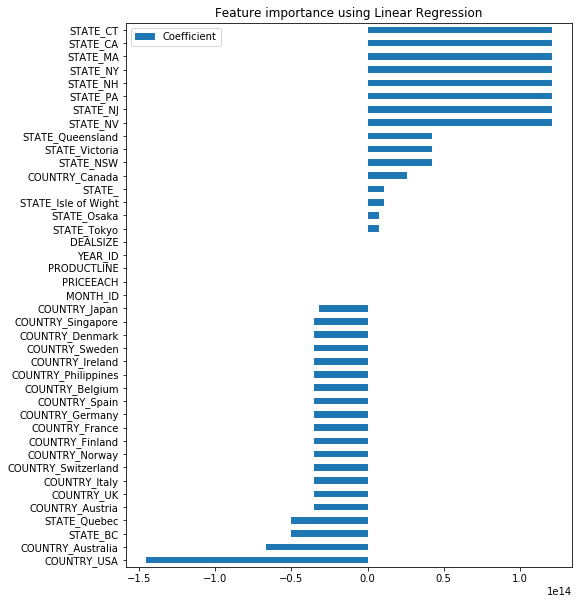

In [6]:
#show the intercept
print(model.intercept_)

#show the slope
print(model.coef_)

#show coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
imp_coef = coeff_df.sort_values(by='Coefficient')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")
#As it can be seen in the plot, the coefficient for priceeach, month and year are not important for the model 
#some countries or states have more influence

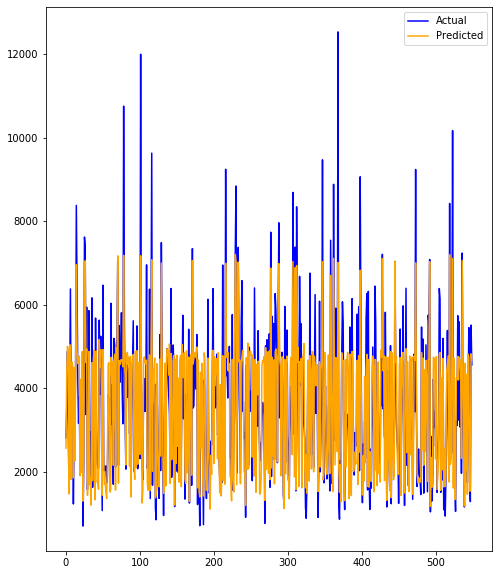

In [7]:
#plot actual vs predicted values
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()
#it can be seen in the graph that higher values are not well predicted, it means that the algorithm is not working correctly 
#further investigation will be needed to correct this error in the prediction
#several issues can be the reason for this problem. 
#For instance, it might be problems in the division of the training/test sets, 
#it may be needed to remove some variables, or put more weight in certain variables 
#you can also apply cross-validation to try to improve the performance
#another option can be reducing the dimensions 
#It is valid to try another model for prediction, because maybe with linear regression it does not work well.


0.757002603361417


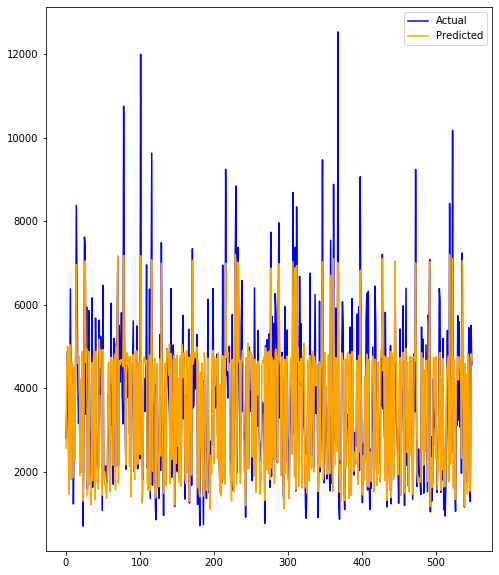

In [8]:
#example with Ridge reggression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
predictions = rr.predict(X_test)
print(rr.score(X_test, y_test))
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()